Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


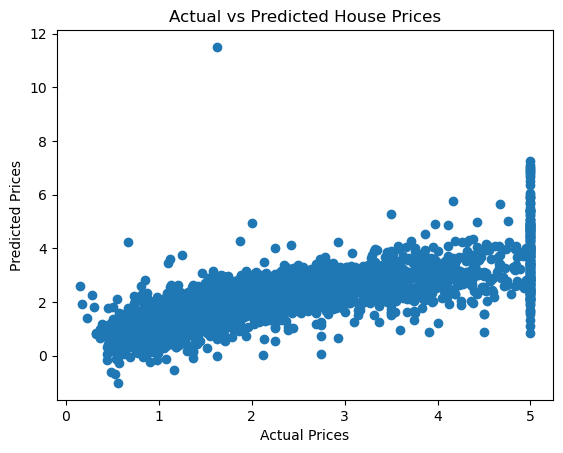

Model has been pickled and saved!

First 5 predictions using the original model:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]

First 5 predictions using the loaded model:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Step 2: Splitting the dataset into training and testing sets
X = california_df.drop('PRICE', axis=1)
y = california_df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Making predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Step 7: Pickling the trained model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model has been pickled and saved!")

# Step 8: Loading the pickled model
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Step 9: Using the loaded model to make predictions
loaded_model_pred = loaded_model.predict(X_test)

# Step 10: Comparing predictions from original and loaded models (they should be the same)
print("\nFirst 5 predictions using the original model:")
print(y_pred[:5])
print("\nFirst 5 predictions using the loaded model:")
print(loaded_model_pred[:5])
